In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import timeit
import scipy.fftpack
from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Sampling theorem
---


In [3]:
# create the signal
srate  = 1000
pnts   = 1000
signal = np.random.randn(pnts)


# The loop of the Fourier transform (although we're not computing it)
#for fi in range(0,pnts):
    #csw = np.exp( -1i*2*np.pi*fi*fourTime )
    #fCoefs[fi] = np.sum( np.multiply(signal,csw) ) / pnts


# compute frequencies vector
hz = np.linspace(0,srate/2,int(np.floor(pnts/2)+1))

# compute frequency resolution
freqres = np.mean(np.diff(hz))

# print result in command window
print('Frequency resolution is',freqres,'Hz')


Frequency resolution is 1.0 Hz


In [7]:
signalX

array([2.        +0.j        , 1.95105652-0.30901699j,
       1.80901699-0.58778525j, 1.58778525-0.80901699j,
       1.30901699-0.95105652j, 1.        -1.j        ,
       0.69098301-0.95105652j, 0.41221475-0.80901699j,
       0.19098301-0.58778525j, 0.04894348-0.30901699j,
       0.        +0.j        , 0.04894348+0.30901699j,
       0.19098301+0.58778525j, 0.41221475+0.80901699j,
       0.69098301+0.95105652j, 1.        +1.j        ,
       1.30901699+0.95105652j, 1.58778525+0.80901699j,
       1.80901699+0.58778525j, 1.95105652+0.30901699j])

In [15]:
time

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

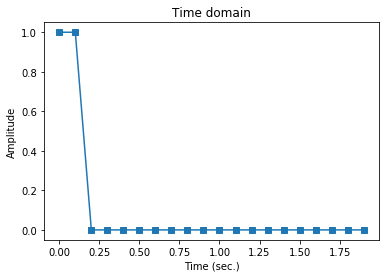

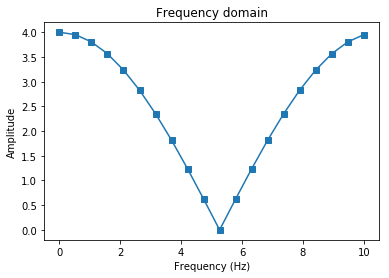

In [9]:
# parameters (try adjusting the srate!)
srate  = 10
time   = np.arange(0,2,1/srate)

# create signal
signal = np.zeros(len(time))
signal[0:np.int(np.round(len(time)*.1))] = 1

# spectrum and frequencies vector
signalX = scipy.fftpack.fft(signal)
hz = np.linspace(0,srate,len(time)) # plotting trick... frequencies really only go up to Nyquist

# plot
plt.plot(time,signal,'s-')
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Time domain')
plt.show()

plt.plot(hz,2*abs(signalX),'s-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain')
plt.show()


---
# VIDEO: Time-domain zero padding
---


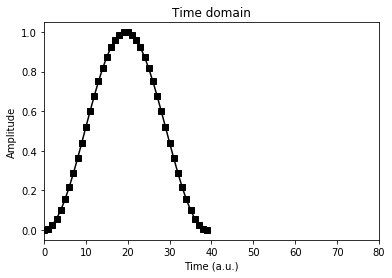

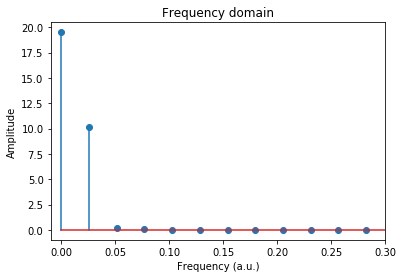

In [22]:
# create the signal
signal = np.hanning(40)

# note: in MATLAB I have a separate cell for the manual zero-padding.
#       Here you can just uncomment the following line.
#signal = np.concatenate((signal,np.zeros(len(signal))),axis=0)

# time the fast Fourier transform
signalX = scipy.fftpack.fft(signal)

# extract amplitude
ampl =np.abs(signalX)

# normalized frequency units
frequnits = np.linspace(0,1,len(signal))

# and plot
plt.plot(signal,'ks-')
plt.xlim(0,80)
plt.xlabel('Time (a.u.)')
plt.ylabel('Amplitude')
plt.title('Time domain')
plt.show()

plt.stem(frequnits,ampl)
plt.xlim(-.01,.3)
plt.xlabel('Frequency (a.u.)')
plt.ylabel('Amplitude')
plt.title('Frequency domain')
plt.show()

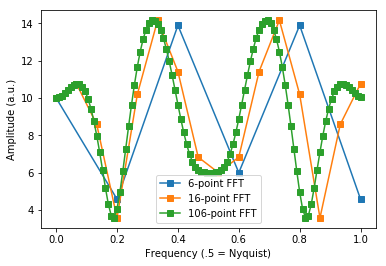

In [5]:
## zero-padding in fft function

# create the signal
signal = [ 4, 6, -1, 0, 5, -4 ]

# number of zeros to add after signal
n2pad = [ 0, 10, 100 ]

for zi in range(0,len(n2pad)):
    
    # total length of signal
    zeropadN = len(signal)+n2pad[zi]
    
    # FFT and amplitude
    sigampl   = np.abs( scipy.fftpack.fft(signal,zeropadN) )
    
    # one of the two normalization steps
    sigampl = sigampl / 1
    
    frequnits = np.linspace(0,1,zeropadN)
    
    # and plot
    plt.plot(frequnits,sigampl,'s-',label='%g-point FFT' %zeropadN)


# add some plot extras
plt.legend()
plt.xlabel('Frequency (.5 = Nyquist)')
plt.ylabel('Amplitude (a.u.)')
plt.show()


---
# VIDEO: Frequency-domain zero padding
---


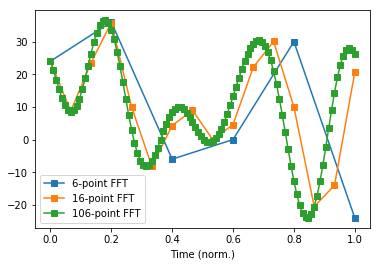

In [6]:
# create the signal
signal = [ 4, 6, -1, 0, 5, -4 ]

# number of zeros to add after spectrum
n2pad = [ 0, 10, 100 ]

for zi in range(0,len(n2pad)):
    
    # fft
    signalX = scipy.fftpack.fft(signal)
    
    # spectral zero-padding
    zeropadN = len(signal)+n2pad[zi]
    
    # reconstruction via ifft
    reconSig = scipy.fftpack.ifft(signalX,zeropadN) * zeropadN
    normtime = np.linspace(0,1,len(reconSig))
    
    # and plot
    plt.plot(normtime,np.real(reconSig),'s-',label='%g-point FFT' %zeropadN)

# add some plot extras
plt.legend()
plt.xlabel('Time (norm.)')
plt.show()

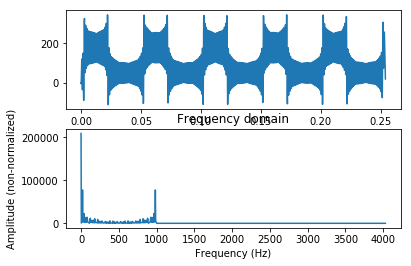

In [107]:
## Another example

# create the signal
srate  = 1000
x      = np.array(range(0,255))/srate
signal = np.sin(2*np.pi*20*x)>.3

# number of zeros to add after spectrum
n2pad = [ 1, 2, 5 ];

for zi in range(0,len(n2pad)):
    
    # fft
    signalX = scipy.fftpack.fft(signal)
    
    # spectral zero-padding
    zeropadN = 2**math.ceil(math.log(len(signal)*n2pad[zi],2))
    
    # reconstruction via ifft
    reconSig = scipy.fftpack.ifft(signalX,zeropadN) * zeropadN
    normtime = np.linspace(x[0],x[-1],len(reconSig)) # new time vector
    srateNew = 1/np.mean(np.diff(normtime)) # new sampling rate
    
    # power spectrum
    ampl = np.abs(scipy.fftpack.fft( np.real(reconSig) ))
    hz   = np.linspace(0,srateNew/2,np.int(np.floor(len(reconSig)/2+1)))
    
    plt.subplot2grid((2,1), (0,0))
    plt.plot(normtime,np.real(reconSig),label='%g-point IFFT' %zeropadN)
    
    # plot amplitude spectrum
    plt.subplot2grid((2,1), (1,0))
    plt.plot(hz,ampl[0:len(hz)])


# add some plot extras
plt.xlabel('Time (sec.)')
plt.title('Time domain')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (non-normalized)')
plt.title('Frequency domain')
plt.show()


---
# VIDEO: Sampling rate vs. signal length
---


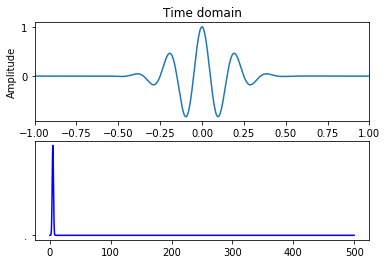

In [7]:
## difference between sampling rate and number of time points for Fourier frequencies

# temporal parameters
srates  = [100, 100, 1000]
timedur = [  1,  10,    1]
freq    = 5 # in Hz, for the signal

colors  = 'kmb'
symbols = 'op.'

for parami in range(0,len(srates)):
    
    # define sampling rate in this round
    srate = srates[parami] # in Hz
    
    # define time
    time = np.arange(-1,timedur[parami],1/srate)
    
    # create signal (Morlet wavelet)
    signal = np.multiply( np.cos(2*np.pi*freq*time) , np.exp( (-time**2) / .05 ) )
    
    # compute FFT and normalize
    signalX = scipy.fftpack.fft(signal)
    signalX = signalX/np.max(signalX)
    
    # define vector of frequencies in Hz
    hz = np.linspace(0,srate/2,int(np.floor(len(signal)/2)+1))
    
    
    # plot time-domain signal
    plt.subplot2grid((2,1), (0,0))
    plt.plot(time,signal,label='')
    plt.xlim([-1,1])
    plt.xlabel('Time (s)'), plt.ylabel('Amplitude')
    plt.title('Time domain')
    
    # plot frequency-domain signal
    plt.subplot2grid((2,1), (1,0))
    plt.plot(hz,np.abs(signalX[0:len(hz)]),colors[parami],symbols[parami],'-')

plt.show()